In [5]:
import pandas as pd 
df = pd.read_csv(r"customer_churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [6]:
# ==============================
# 📦 IMPORTS & CONFIGURATION
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                              roc_auc_score, roc_curve, accuracy_score,
                              f1_score, recall_score)
from xgboost import XGBClassifier

import joblib

pd.set_option("display.max_columns", 50)
sns.set_theme(style="whitegrid")

print("✅ Toutes les bibliothèques importées !")

✅ Toutes les bibliothèques importées !


In [7]:
## 2️) Chargement des données
# ==============================
#CHARGEMENT DES DONNÉES
# ==============================

df = pd.read_csv("customer_churn_data.csv")

print("✅ Dataset chargé !")
print("Shape:", df.shape)
print("\nColonnes:", df.columns.tolist())
df.head()

✅ Dataset chargé !
Shape: (5880, 21)

Colonnes: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [8]:
## 3️) Exploration des données (EDA)
# Infos générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [9]:
# Statistiques descriptives
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [10]:
# Valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
display(pd.DataFrame({
    "Manquants": missing,
    "Pourcentage %": missing_pct
}).query("Manquants > 0"))

print("✅ Aucune valeur manquante !" if df.isnull().sum().sum() == 0 else "⚠️ Valeurs manquantes détectées !")

,Manquants,Pourcentage %


✅ Aucune valeur manquante !


In [11]:
# Distribution du Churn
print("=== Distribution du Churn ===")
print(df["Churn"].value_counts())
print("\nTaux de churn:", round((df["Churn"] == "Yes").mean() * 100, 2), "%")

=== Distribution du Churn ===
Churn
No     2982
Yes    2898
Name: count, dtype: int64

Taux de churn: 49.29 %


In [12]:
## 4️) Nettoyage des données
# ==============================
# 🧹 NETTOYAGE DES DONNÉES
# ==============================

# Supprimer customerID
df_clean = df.drop(columns=["customerID"])

# Encoder Gender
df_clean["gender"] = df_clean["gender"].map({"Male": 1, "Female": 0})

# Encoder les colonnes binaires
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary_cols:
    df_clean[col] = df_clean[col].map({"Yes": 1, "No": 0})

# Encoder la target
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

print("✅ Colonnes binaires encodées !")
df_clean.head()

✅ Colonnes binaires encodées !


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,23,0,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,0,0,1,0,43,0,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,1,1,0,0,51,1,No,DSL,No,Yes,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,1,1,0,0,72,1,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,1,1,0,0,25,1,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1


In [13]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=[
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
], drop_first=True)

print("✅ One-Hot Encoding terminé !")
print("Shape final:", df_encoded.shape)
df_encoded.head()

✅ One-Hot Encoding terminé !
Shape final: (5880, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,23,0,1,49.85,1146.55,0,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False
1,0,0,1,0,43,0,0,100.70,4330.10,1,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
2,1,1,0,0,51,1,0,97.33,4963.83,1,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False
3,1,1,0,0,72,1,0,101.38,7299.36,0,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,1,1,0,0,25,1,0,52.22,1305.50,1,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


In [14]:
## 5️) Feature Engineering
# ==============================
#  FEATURE ENGINEERING
# ==============================

df_encoded["charges_per_month"]   = df_encoded["TotalCharges"] / (df_encoded["tenure"] + 1)
df_encoded["is_long_term"]        = (df_encoded["tenure"] > 24).astype(int)
df_encoded["high_monthly_charge"] = (df_encoded["MonthlyCharges"] > df_encoded["MonthlyCharges"].median()).astype(int)

print("✅ 3 nouvelles variables créées :")
print("  - charges_per_month")
print("  - is_long_term")
print("  - high_monthly_charge")

✅ 3 nouvelles variables créées :
  - charges_per_month
  - is_long_term
  - high_monthly_charge


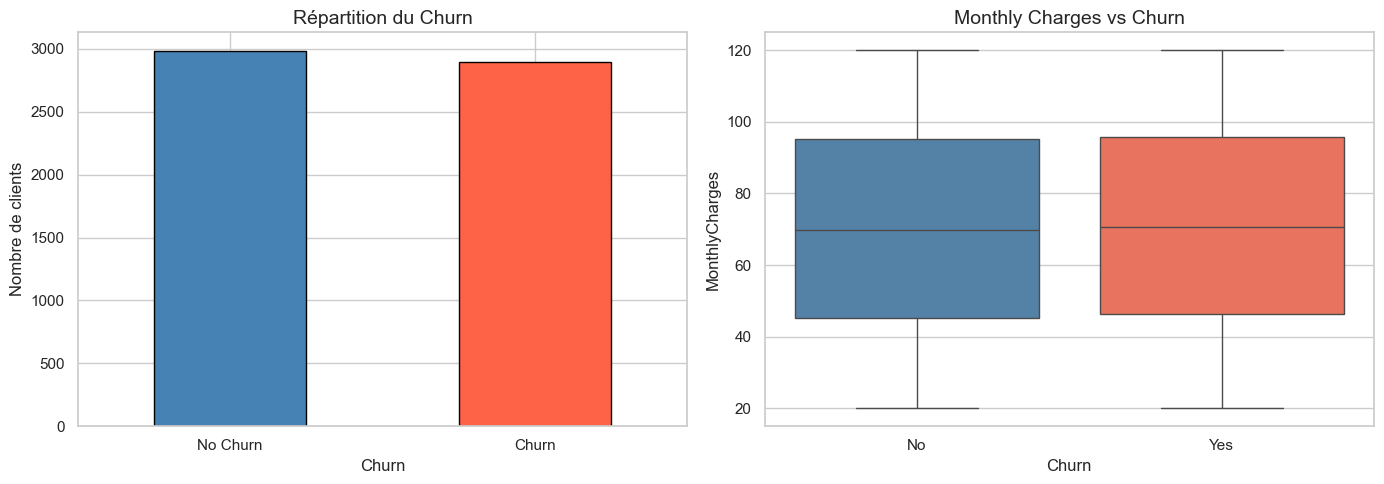

✅ Graphique sauvegardé !


In [16]:
## 6️) Visualisations
# ==============================
#  VISUALISATION 1 — Churn & Monthly Charges
# ==============================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution Churn
df["Churn"].value_counts().plot(kind="bar", ax=axes[0],
    color=["steelblue", "tomato"], edgecolor="black")
axes[0].set_title("Répartition du Churn", fontsize=14)
axes[0].set_ylabel("Nombre de clients")
axes[0].set_xticklabels(["No Churn", "Churn"], rotation=0)

# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,
            palette={"No": "steelblue", "Yes": "tomato"}, ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn", fontsize=14)

plt.tight_layout()

plt.show()
print("✅ Graphique sauvegardé !")

<Figure size 1000x500 with 0 Axes>

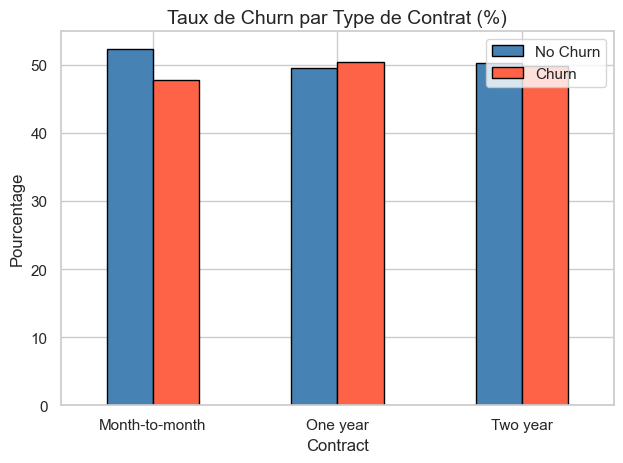

In [17]:
# ==============================
# 📊 VISUALISATION 2 — Churn par Contrat
# ==============================

plt.figure(figsize=(10, 5))
ct = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
ct.plot(kind="bar", color=["steelblue", "tomato"], edgecolor="black")
plt.title("Taux de Churn par Type de Contrat (%)", fontsize=14)
plt.ylabel("Pourcentage")
plt.xticks(rotation=0)
plt.legend(["No Churn", "Churn"])
plt.tight_layout()

plt.show()

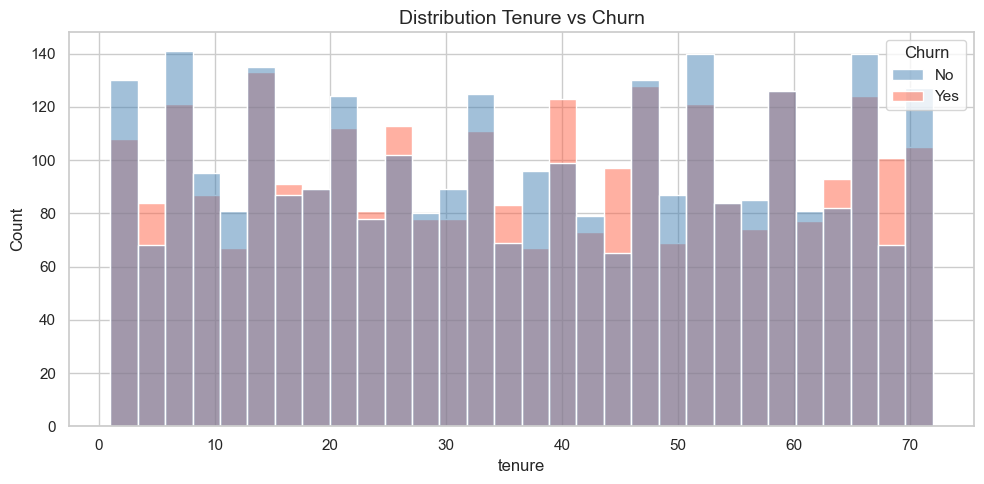

In [18]:
# ==============================
# 📊 VISUALISATION 3 — Tenure vs Churn
# ==============================

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="tenure", hue="Churn",
             bins=30, palette={"No": "steelblue", "Yes": "tomato"})
plt.title("Distribution Tenure vs Churn", fontsize=14)
plt.tight_layout()

plt.show()

In [20]:
from imblearn.over_sampling import SMOTE
# ==============================
# ⚖️ SPLIT + SMOTE + SCALING
# ==============================

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

print("Distribution avant SMOTE:", y.value_counts().to_dict())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_sm)
X_test_sc  = scaler.transform(X_test)

print("Distribution après SMOTE:", pd.Series(y_train_sm).value_counts().to_dict())
print("✅ Données prêtes pour la modélisation !")

Distribution avant SMOTE: {0: 2982, 1: 2898}
Distribution après SMOTE: {0: 2386, 1: 2386}
✅ Données prêtes pour la modélisation !


In [21]:
## 8️ Entraînement des modèles
# ==============================
# 🤖 ENTRAÎNEMENT DES MODÈLES
# ==============================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest":        RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting":    GradientBoostingClassifier(random_state=42),
    "XGBoost":              XGBClassifier(random_state=42, eval_metric="logloss")
}

results = {}
for name, model in models.items():
    model.fit(X_train_sc, y_train_sm)
    y_pred = model.predict(X_test_sc)
    auc    = roc_auc_score(y_test, model.predict_proba(X_test_sc)[:,1])
    results[name] = {"model": model, "y_pred": y_pred, "AUC": auc}
    print(f"\n{'='*45}\n  {name}  |  AUC: {round(auc,4)}\n{'='*45}")
    print(classification_report(y_test, y_pred))


  Logistic Regression  |  AUC: 0.4868
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       596
           1       0.49      0.49      0.49       580

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.49      1176
weighted avg       0.49      0.49      0.49      1176


  Random Forest  |  AUC: 0.4799
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       596
           1       0.48      0.42      0.45       580

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.49      1176


  Gradient Boosting  |  AUC: 0.489
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       596
           1       0.49      0.49      0.49       580

    accuracy                           0.50      1176
   macro avg       0

In [22]:
## 9️ Évaluation & Comparaison des modèles
# ==============================
# 📈 TABLEAU COMPARATIF
# ==============================

summary = []
for name, res in results.items():
    summary.append({
        "Modèle":   name,
        "Accuracy": round(accuracy_score(y_test, res["y_pred"]), 4),
        "F1-Score": round(f1_score(y_test, res["y_pred"]), 4),
        "Recall":   round(recall_score(y_test, res["y_pred"]), 4),
        "AUC-ROC":  round(res["AUC"], 4)
    })

summary_df = pd.DataFrame(summary).sort_values("AUC-ROC", ascending=False)
display(summary_df)

,Modèle,Accuracy,F1-Score,Recall,AUC-ROC
2,Gradient Boosting,0.4991,0.4892,0.4862,0.4890
0,Logistic Regression,0.4932,0.4871,0.4879,0.4868
1,Random Forest,0.4872,0.4493,0.4241,0.4799
3,XGBoost,0.4796,0.4796,0.4862,0.4772


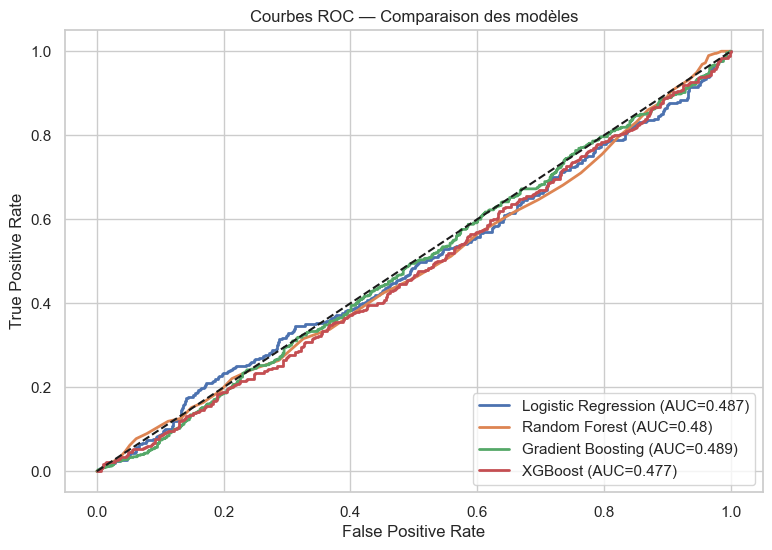

In [23]:
# Courbes ROC
plt.figure(figsize=(9, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["model"].predict_proba(X_test_sc)[:,1])
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={round(res['AUC'],3)})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC — Comparaison des modèles")
plt.legend(loc="lower right")

plt.show()

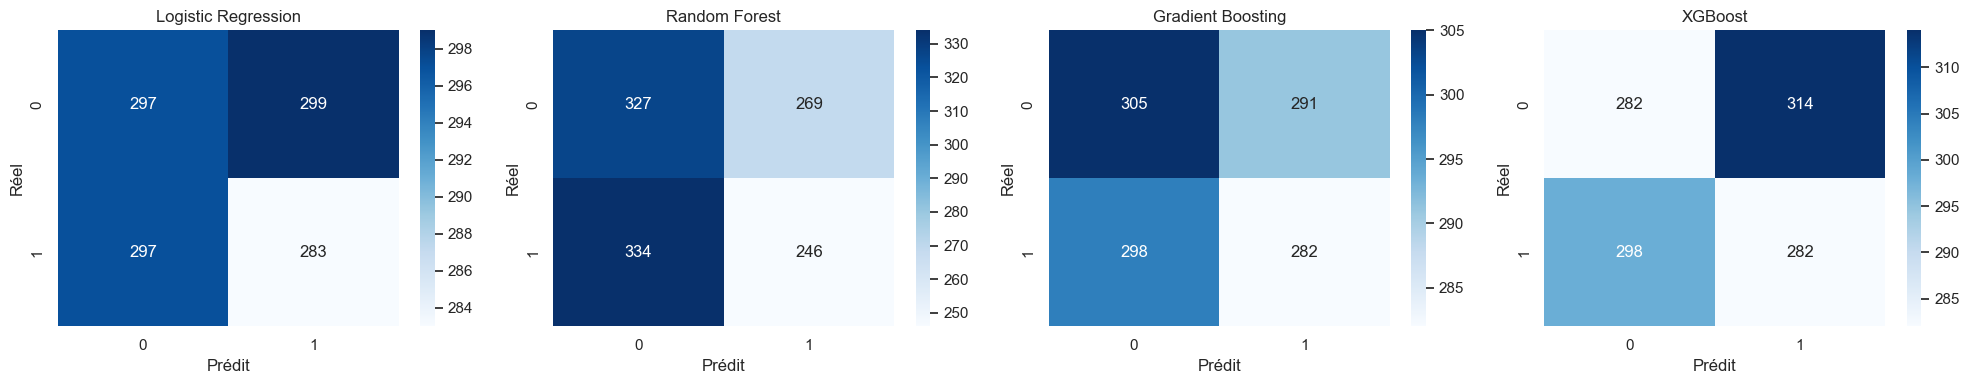

In [25]:
# Matrices de confusion
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res["y_pred"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Prédit")
    ax.set_ylabel("Réel")
plt.tight_layout()

plt.show()

In [26]:
## 10) Optimisation XGBoost
# ==============================
#  GRID SEARCH XGBOOST
# ==============================

param_grid = {
    "n_estimators":  [100, 200],
    "max_depth":     [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample":     [0.8, 1.0]
}

grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric="logloss"),
    param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1
)
grid.fit(X_train_sc, y_train_sm)

print("✅ Meilleurs paramètres:", grid.best_params_)
print("✅ Meilleur AUC (CV):", round(grid.best_score_, 4))

best_model  = grid.best_estimator_
y_pred_best = best_model.predict(X_test_sc)
auc_best    = roc_auc_score(y_test, best_model.predict_proba(X_test_sc)[:,1])

print(f"\n🏆 AUC final: {round(auc_best, 4)}")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Meilleurs paramètres: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
✅ Meilleur AUC (CV): 0.5311

🏆 AUC final: 0.4868
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       596
           1       0.49      0.49      0.49       580

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.49      1176
weighted avg       0.49      0.49      0.49      1176



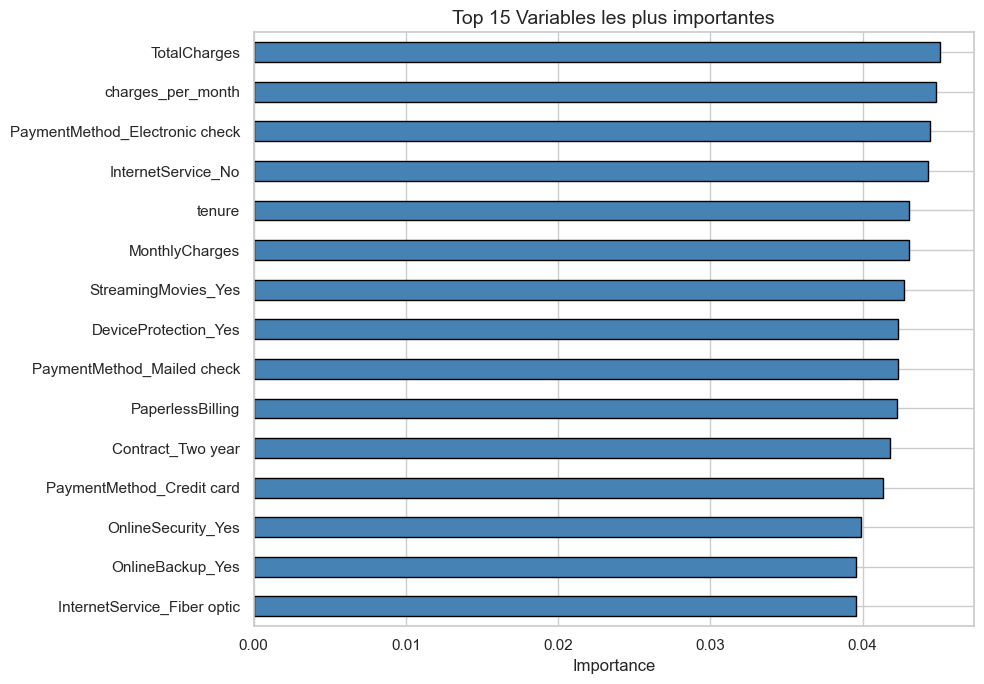

In [27]:
# Importance des variables
feat_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=True).tail(15)

plt.figure(figsize=(10, 7))
feat_importance.plot(kind="barh", color="steelblue", edgecolor="black")
plt.title("Top 15 Variables les plus importantes", fontsize=14)
plt.xlabel("Importance")
plt.tight_layout()

plt.show()

In [28]:
## 1️1) Sauvegarde du modèle
# ==============================
#  SAUVEGARDE DU MODÈLE
# ==============================

import os
os.makedirs("models", exist_ok=True)

joblib.dump(best_model,      "models/model_churn.pkl")
joblib.dump(scaler,          "models/scaler_churn.pkl")
joblib.dump(list(X.columns), "models/features.pkl")

print("✅ model_churn.pkl    → sauvegardé")
print("✅ scaler_churn.pkl   → sauvegardé")
print("✅ features.pkl       → sauvegardé")

✅ model_churn.pkl    → sauvegardé
✅ scaler_churn.pkl   → sauvegardé
✅ features.pkl       → sauvegardé


In [29]:
## 1️2) Prédiction d'un nouveau client
# ==============================
#  PRÉDICTION NOUVEAU CLIENT
# ==============================

model    = joblib.load("models/model_churn.pkl")
scaler   = joblib.load("models/scaler_churn.pkl")
features = joblib.load("models/features.pkl")

# Nouveau client exemple
nouveau_client = pd.DataFrame([{col: 0 for col in features}])
nouveau_client["tenure"]         = 12
nouveau_client["MonthlyCharges"] = 75.5
nouveau_client["TotalCharges"]   = 900.0

client_sc   = scaler.transform(nouveau_client)
prediction  = model.predict(client_sc)[0]
probabilite = model.predict_proba(client_sc)[0][1]

print(f"Prédiction  : {'🔴 CHURN' if prediction == 1 else '🟢 PAS DE CHURN'}")
print(f"Probabilité : {round(probabilite * 100, 2)} %")

Prédiction  : 🟢 PAS DE CHURN
Probabilité : 32.15999984741211 %


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                      Conv1D, MaxPooling1D, Flatten,
                                      LSTM, Reshape)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

print("✅ TensorFlow version:", tf.__version__)

✅ TensorFlow version: 2.20.0


In [31]:
## 1️3) Deep Learning — 3 Algorithmes
## 1️3)--> Deep Learning — 3 Algorithmes
# ==============================
# MODÈLE 1 — ANN AVANCÉ
# ==============================

model_ann = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_sc.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dense(1,  activation="sigmoid")
])

model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 15,681 (61.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

history_ann = model_ann.fit(
    X_train_sc, y_train_sm,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("✅ ANN Avancé entraîné !")

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5159 - loss: 0.7476 - val_accuracy: 0.5435 - val_loss: 0.6931
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5085 - loss: 0.7157 - val_accuracy: 0.5047 - val_loss: 0.6983
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5007 - loss: 0.7108 - val_accuracy: 0.5058 - val_loss: 0.6981
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5166 - loss: 0.7042 - val_accuracy: 0.4880 - val_loss: 0.6972
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5132 - loss: 0.6993 - val_accuracy: 0.5005 - val_loss: 0.7000
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5085 - loss: 0.6977 - val_accuracy: 0.4911 - val_loss: 0.6980
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5258 - loss: 0.6944 - val_accuracy: 0.5016 - val_loss: 0.6987
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5085 - loss: 0.6967 - val_ac

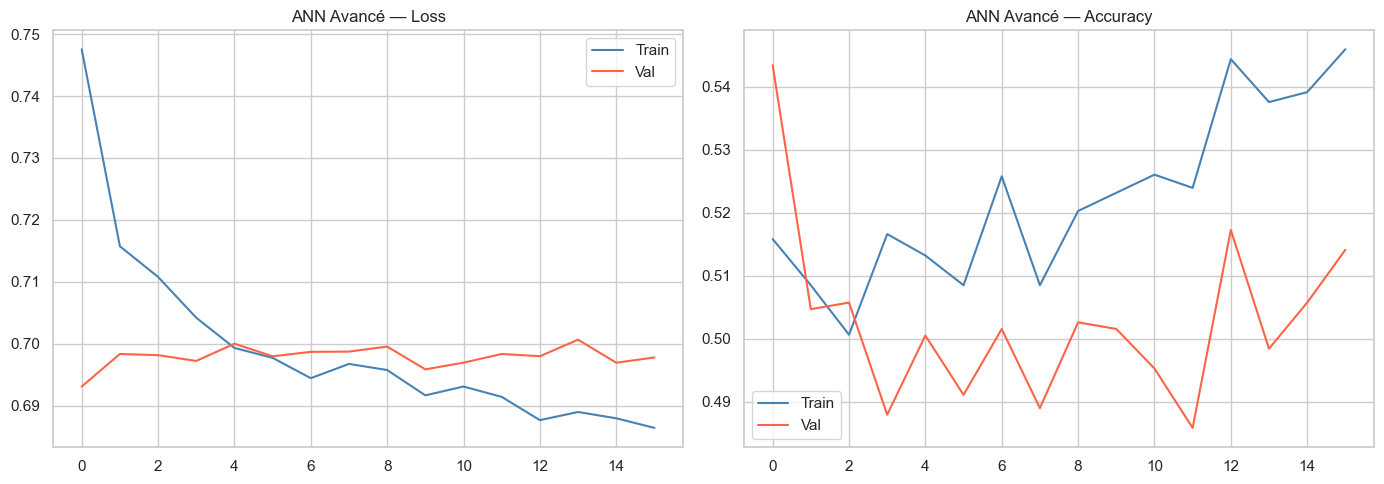

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_ann.history["loss"],     label="Train", color="steelblue")
axes[0].plot(history_ann.history["val_loss"], label="Val",   color="tomato")
axes[0].set_title("ANN Avancé — Loss")
axes[0].legend()

axes[1].plot(history_ann.history["accuracy"],     label="Train", color="steelblue")
axes[1].plot(history_ann.history["val_accuracy"], label="Val",   color="tomato")
axes[1].set_title("ANN Avancé — Accuracy")
axes[1].legend()

plt.tight_layout()

plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  ANN Avancé  |  AUC: 0.5157
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       596
           1       0.49      0.66      0.56       580

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.48      1176



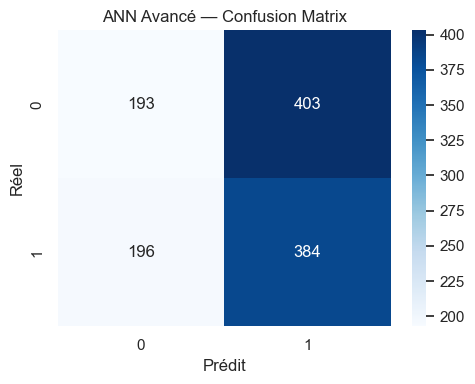

In [34]:
y_pred_ann  = (model_ann.predict(X_test_sc) > 0.5).astype(int).flatten()
y_proba_ann = model_ann.predict(X_test_sc).flatten()
auc_ann     = roc_auc_score(y_test, y_proba_ann)

print("="*45)
print(f"  ANN Avancé  |  AUC: {round(auc_ann, 4)}")
print("="*45)
print(classification_report(y_test, y_pred_ann))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann),
            annot=True, fmt="d", cmap="Blues")
plt.title("ANN Avancé — Confusion Matrix")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()

plt.show()

In [35]:
### 🔹 Modèle 2 — CNN (Convolutional Neural Network)
# ==============================
#  MODÈLE 2 — CNN
# ==============================

# Reshape pour CNN (samples, timesteps, features)
X_train_cnn = X_train_sc.reshape(X_train_sc.shape[0], X_train_sc.shape[1], 1)
X_test_cnn  = X_test_sc.reshape(X_test_sc.shape[0], X_test_sc.shape[1], 1)

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu",
           input_shape=(X_train_sc.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=32, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    MaxPooling1D(pool_size=2),
    Flatten(),

    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1,  activation="sigmoid")
])

model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 31, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 31, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 29, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,665 (147.13 KB)

 Trainable params: 37,473 (146.38 KB)

 Non-trainable params: 192 (768.00 B)

In [36]:
early_stop2 = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

history_cnn = model_cnn.fit(
    X_train_cnn, y_train_sm,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop2],
    verbose=1
)

print("✅ CNN entraîné !")

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5020 - loss: 0.7493 - val_accuracy: 0.4754 - val_loss: 0.7013
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5151 - loss: 0.7025 - val_accuracy: 0.4660 - val_loss: 0.7113
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5109 - loss: 0.7007 - val_accuracy: 0.4806 - val_loss: 0.7031
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5245 - loss: 0.6949 - val_accuracy: 0.4806 - val_loss: 0.7001
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5072 - loss: 0.6950 - val_accuracy: 0.4984 - val_loss: 0.6988
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5124 - loss: 0.6961 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5177 - loss: 0.6937 - val_accuracy: 0.5079 - val_loss: 0.6965
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5331 - loss: 0.6927 - val_a

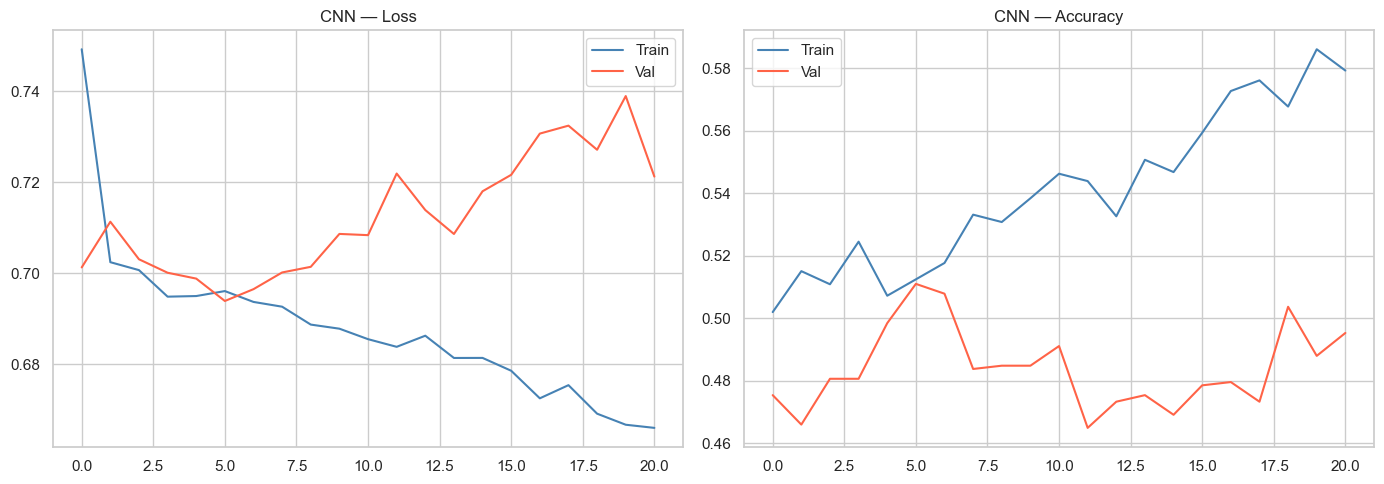

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_cnn.history["loss"],     label="Train", color="steelblue")
axes[0].plot(history_cnn.history["val_loss"], label="Val",   color="tomato")
axes[0].set_title("CNN — Loss")
axes[0].legend()

axes[1].plot(history_cnn.history["accuracy"],     label="Train", color="steelblue")
axes[1].plot(history_cnn.history["val_accuracy"], label="Val",   color="tomato")
axes[1].set_title("CNN — Accuracy")
axes[1].legend()

plt.tight_layout()

plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
  CNN  |  AUC: 0.4975
              precision    recall  f1-score   support

           0       0.51      0.38      0.43       596
           1       0.49      0.62      0.55       580

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.49      1176



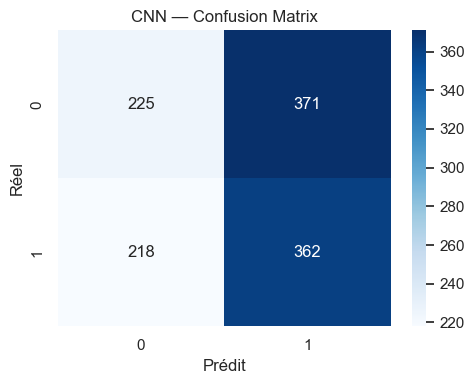

In [38]:
y_pred_cnn  = (model_cnn.predict(X_test_cnn) > 0.5).astype(int).flatten()
y_proba_cnn = model_cnn.predict(X_test_cnn).flatten()
auc_cnn     = roc_auc_score(y_test, y_proba_cnn)

print("="*45)
print(f"  CNN  |  AUC: {round(auc_cnn, 4)}")
print("="*45)
print(classification_report(y_test, y_pred_cnn))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn),
            annot=True, fmt="d", cmap="Blues")
plt.title("CNN — Confusion Matrix")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()

plt.show()

In [39]:
###  Modèle 3 — RNN / LSTM
# ==============================
# MODÈLE 3 — LSTM
# ==============================

# Reshape pour LSTM (samples, timesteps, features)
X_train_lstm = X_train_sc.reshape(X_train_sc.shape[0], X_train_sc.shape[1], 1)
X_test_lstm  = X_test_sc.reshape(X_test_sc.shape[0], X_test_sc.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, return_sequences=True,
         input_shape=(X_train_sc.shape[1], 1)),
    Dropout(0.3),

    LSTM(32, return_sequences=False),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dense(1,  activation="sigmoid")
])

model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 33, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 33, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,041 (121.25 KB)

 Trainable params: 30,977 (121.00 KB)

 Non-trainable params: 64 (256.00 B)

In [40]:
early_stop3 = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

history_lstm = model_lstm.fit(
    X_train_lstm, y_train_sm,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop3],
    verbose=1
)

print("✅ LSTM entraîné !")

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.4996 - loss: 0.7072 - val_accuracy: 0.5403 - val_loss: 0.6908
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4946 - loss: 0.6980 - val_accuracy: 0.5403 - val_loss: 0.6915
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5203 - loss: 0.6942 - val_accuracy: 0.5403 - val_loss: 0.6907
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5179 - loss: 0.6942 - val_accuracy: 0.5194 - val_loss: 0.6931
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5077 - loss: 0.6936 - val_accuracy: 0.5403 - val_loss: 0.6898
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5109 - loss: 0.6939 - val_accuracy: 0.5183 - val_loss: 0.6924
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5127 - loss: 0.6928 - val_accuracy: 0.4743 - val_loss: 0.6958
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5182 - loss: 0.6925 -

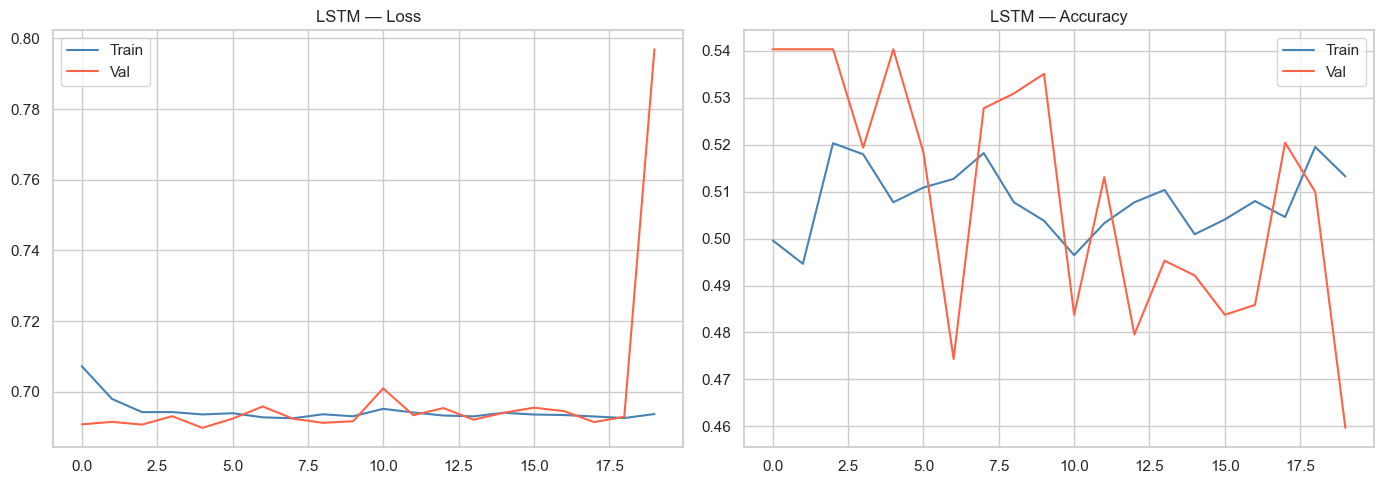

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_lstm.history["loss"],     label="Train", color="steelblue")
axes[0].plot(history_lstm.history["val_loss"], label="Val",   color="tomato")
axes[0].set_title("LSTM — Loss")
axes[0].legend()

axes[1].plot(history_lstm.history["accuracy"],     label="Train", color="steelblue")
axes[1].plot(history_lstm.history["val_accuracy"], label="Val",   color="tomato")
axes[1].set_title("LSTM — Accuracy")
axes[1].legend()

plt.tight_layout()

plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
  LSTM  |  AUC: 0.5071
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       596
           1       0.50      0.81      0.61       580

    accuracy                           0.50      1176
   macro avg       0.51      0.50      0.45      1176
weighted avg       0.51      0.50      0.45      1176



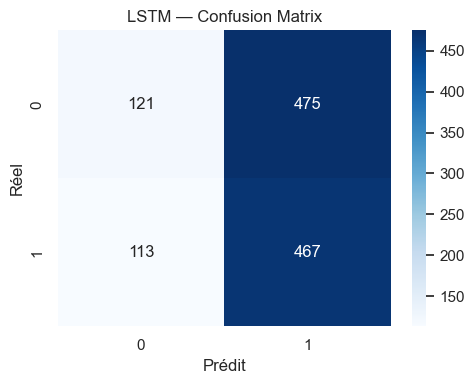

In [42]:
y_pred_lstm  = (model_lstm.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_proba_lstm = model_lstm.predict(X_test_lstm).flatten()
auc_lstm     = roc_auc_score(y_test, y_proba_lstm)

print("="*45)
print(f"  LSTM  |  AUC: {round(auc_lstm, 4)}")
print("="*45)
print(classification_report(y_test, y_pred_lstm))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm),
            annot=True, fmt="d", cmap="Blues")
plt.title("LSTM — Confusion Matrix")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()

plt.show()

In [43]:
### Comparaison des 3 modèles DL
# ==============================
# 📊 COMPARAISON DES 3 MODÈLES DL
# ==============================

summary_dl = pd.DataFrame([
    {
        "Modèle":   "ANN Avancé",
        "Accuracy": round(accuracy_score(y_test, y_pred_ann), 4),
        "F1-Score": round(f1_score(y_test, y_pred_ann), 4),
        "Recall":   round(recall_score(y_test, y_pred_ann), 4),
        "AUC-ROC":  round(auc_ann, 4)
    },
    {
        "Modèle":   "CNN",
        "Accuracy": round(accuracy_score(y_test, y_pred_cnn), 4),
        "F1-Score": round(f1_score(y_test, y_pred_cnn), 4),
        "Recall":   round(recall_score(y_test, y_pred_cnn), 4),
        "AUC-ROC":  round(auc_cnn, 4)
    },
    {
        "Modèle":   "LSTM",
        "Accuracy": round(accuracy_score(y_test, y_pred_lstm), 4),
        "F1-Score": round(f1_score(y_test, y_pred_lstm), 4),
        "Recall":   round(recall_score(y_test, y_pred_lstm), 4),
        "AUC-ROC":  round(auc_lstm, 4)
    }
]).sort_values("AUC-ROC", ascending=False)

display(summary_dl)

,Modèle,Accuracy,F1-Score,Recall,AUC-ROC
0,ANN Avancé,0.4906,0.5618,0.6621,0.5157
2,LSTM,0.5000,0.6137,0.8052,0.5071
1,CNN,0.4991,0.5514,0.6241,0.4975


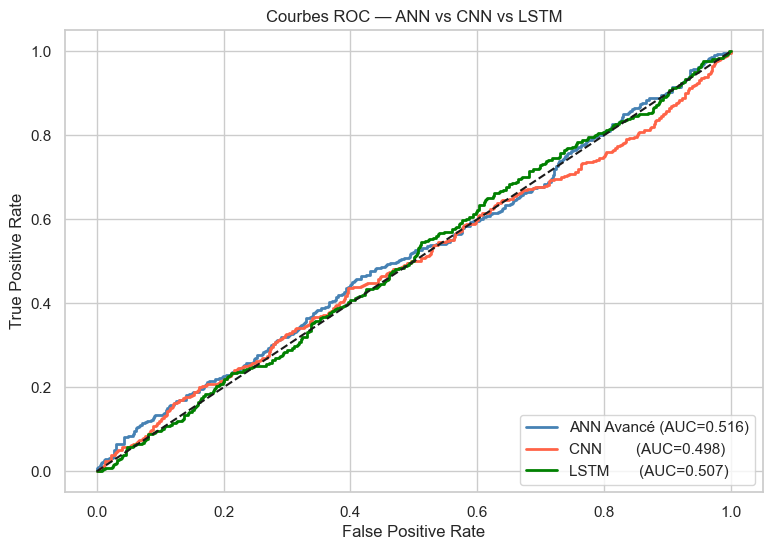

In [44]:
plt.figure(figsize=(9, 6))

fpr1, tpr1, _ = roc_curve(y_test, y_proba_ann)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_cnn)
fpr3, tpr3, _ = roc_curve(y_test, y_proba_lstm)

plt.plot(fpr1, tpr1, lw=2, label=f"ANN Avancé (AUC={round(auc_ann,3)})",  color="steelblue")
plt.plot(fpr2, tpr2, lw=2, label=f"CNN        (AUC={round(auc_cnn,3)})",  color="tomato")
plt.plot(fpr3, tpr3, lw=2, label=f"LSTM       (AUC={round(auc_lstm,3)})", color="green")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC — ANN vs CNN vs LSTM")
plt.legend(loc="lower right")

plt.show()

In [45]:
model_ann.save("models/ann_advanced.keras")
model_cnn.save("models/cnn_model.keras")
model_lstm.save("models/lstm_model.keras")

print("✅ ann_advanced.keras  → sauvegardé")
print("✅ cnn_model.keras     → sauvegardé")
print("✅ lstm_model.keras    → sauvegardé")

✅ ann_advanced.keras  → sauvegardé
✅ cnn_model.keras     → sauvegardé
✅ lstm_model.keras    → sauvegardé
